<a href="https://colab.research.google.com/github/mn300/python_remotesensing/blob/main/229040002_GY7709_CW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mapping fire damage from the wildfires in Larache Province, Morocco, in 2022 using Sentinel-2 Normalised Burn Ratio (NBR) and differenced NBR

Student No. - 229040002

Course Work - 1

# Connecting to the Google Drive

In [ ]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installing and Importing the required libraries

In [ ]:
# installing libraries
!pip install rasterio
!pip install geopandas
!pip install rasterstats
!pip install earthengine-api
!pip install requests
!pip install sentinelsat
!pip install rioxarray

# importing libraries
import geopandas as gpd
import rasterio
from rasterio import plot
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal, ogr
import json
import os
from os import listdir
from os.path import isfile, isdir, join
import math
from pprint import pprint
import shutil
import sys
import zipfile
import requests
import io
import webbrowser
import ee
import pickle
import pandas as pd
from rasterstats import zonal_stats


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 65.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 77.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 5.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     

# Defining the Root Directory

Importing the pygge library. Including plots in line for the document.

In [ ]:
# pygge library source

'''

Balzter, H. 2023, PYGGE library
https://blackboard.le.ac.uk/ultra/courses/_59587_1/cl/outline
Downloaded 3 April 2023

'''


'\n\nBalzter, H. 2023, PYGGE library\nhttps://blackboard.le.ac.uk/ultra/courses/_59587_1/cl/outline\nDownloaded 3 April 2023\n\n'

In [ ]:
'''
--------------------------------------------------------------
The following block of code is modified from:

Balzter, H. (2020)
Time series analysis in Python 2 (Version 10 January 2020)
https://github.com/eogit/gy7709/blob/master/P07_timeseries_analysis_2.ipynb
Downloaded 3 April 2023
--------------------------------------------------------------
'''

'\n--------------------------------------------------------------\nThe following block of code is modified from:\n\nBalzter, H. (2020)\nTime series analysis in Python 2 (Version 10 January 2020)\nhttps://github.com/eogit/gy7709/blob/master/P07_timeseries_analysis_2.ipynb\nDownloaded 3 April 2023\n--------------------------------------------------------------\n'

In [ ]:
# defining the root directory
rootdir = '/content/drive/MyDrive/CW1_task2'

if rootdir not in sys.path:
    sys.path.append(rootdir)
# importing the pygge library of functions
import pygge

%matplotlib inline

# Connecting to Google Earth Engine API

In [ ]:
# Connecting to Google Earth Engine API
!earthengine authenticate

ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=V5hHo2zEMvfgaPNa17yTt2mwdUCnSF_njq8_k1IJFVs&tc=U9NToSg9tmNIQL6kSKlAy93ZpyBA5TVW_J0Se6cyuuU&cc=NS2BzNSxJzEeAz3uM9YSdBX3SMiAzXx4z0h2zfrnJQI

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VPY9KjVgot2ZjmgtA8jspzhvV260traCe6uUMywPy9onQLC5vy86Vg

Successfully saved authorization token.


# Setting up Directories

In [ ]:
# setting up directories
# path to Google Drive
print("Connected to data directory: " + rootdir)

# path to temporary drive on the Colab Virtual Machine.
cd = "/content/work"

# directory for downloading the Sentinel-2 composites

downloaddir = join(cd, 'download')

# removing the named directories and everything inside them to free up space

try:
  shutil.rmtree(downloaddir)
except:
  print(downloaddir + " not found.")

# creating the new directories, unless they already exist
os.makedirs(cd, exist_ok=True)
os.makedirs(downloaddir, exist_ok=True)

print("Connected to Colab temporary data directory: " + cd)

print("\nList of contents of " + rootdir)
for f in sorted(os.listdir(rootdir)):
  print(f)
  # directory for downloading the Sentinel-2 granules

outdir = join(cd, 'out')
try:
  shutil.rmtree(outdir)
except:
  print(outdir + " not found.")

# create the new directories, unless they already exist

os.makedirs(outdir, exist_ok=True)

Connected to data directory: /content/drive/MyDrive/CW1_task2
/content/work/download not found.
Connected to Colab temporary data directory: /content/work

List of contents of /content/drive/MyDrive/CW1_task2
229040002_GY7709_CW1.html
229040002_GY7709_CW1.ipynb
Copy of 229040002_GY7709_CW1.ipynb
__pycache__
burn_polygon
dnbr.tif
larache_province
merged_polygons
ndvi_diff.tif
polygons_burnt
pygge.ipynb
pygge.py
/content/work/out not found.


# Adding the shapefile for the search area

The date range was set considering the nearest proximity to the fire to get the best values for vegetation indices, with a cloud cover of 10%.

Overall Green Forest fire alert in Morocco from 13 Jul 2022 00:00 UTC to 24 Jul 2022 00:00 UTC (no date). Available at: https://www.gdacs.org/report.aspx?eventtype=WF&eventid=1007260 (Accessed: 3 April 2023).


In [ ]:
'''
--------------------------------------------------------------
The following block of code is modified from:

Balzter, H. (2020)
Time series analysis in Python 2 (Version 10 January 2020)
https://github.com/eogit/gy7709/blob/master/P07_timeseries_analysis_2.ipynb
Downloaded 3 April 2023
--------------------------------------------------------------
'''

'\n--------------------------------------------------------------\nThe following block of code is modified from:\n\nBalzter, H. (2020)\nTime series analysis in Python 2 (Version 10 January 2020)\nhttps://github.com/eogit/gy7709/blob/master/P07_timeseries_analysis_2.ipynb\nDownloaded 3 April 2023\n--------------------------------------------------------------\n'

In [ ]:
shapefile = join(rootdir, 'larache_province', 'Export_Output_2.shp') # ESRI Shapefile of the study area

# check whether the shapefile exists
if os.path.exists(shapefile):
  print('Shapefile found: '+shapefile)
else:
  print('ERROR: Shapefile not found: '+shapefile)
  print('Upload a shapefile to your Google Drive directory: '+ rootdir)

# Defining a date range for search
datefrom = '2022-06-01' # start date for imagery search
dateto   = '2022-09-15' # end date for imagery search
time_range = [datefrom, dateto] # format as a list


clouds = 10 # maximum acceptable cloud cover in %

Shapefile found: /content/drive/MyDrive/CW1_task2/larache_province/Export_Output_2.shp


In [ ]:
# Getting the shapefile layer's extent, CRS and EPSG code
extent, outSpatialRef, epsg = pygge.get_shp_extent(shapefile)
print("Extent of the area of interest (shapefile):\n", extent)
print(type(extent))
print("\nCoordinate referencing system (CRS) of the shapefile:\n", outSpatialRef)
print('EPSG code: ', epsg)

Extent of the area of interest (shapefile):
 (-6.250138999999933, -5.46281799999997, 34.91344700000002, 35.476787000000115)
<class 'tuple'>

Coordinate referencing system (CRS) of the shapefile:
 GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AXIS["Latitude",NORTH],
    AXIS["Longitude",EAST],
    AUTHORITY["EPSG","4326"]]
EPSG code:  4326


In [ ]:
# making a list to define the coordinates to convert area of interest to GeoJSON polygon
extent_list = list(extent)
print(extent_list)
print(type(extent_list))

# making list elements in the form of coordinate pairs (y,x)
area_list = list([(extent[0], extent[2]),(extent[1], extent[2]),(extent[1], extent[3]),(extent[0], extent[3]),(extent[0], extent[2])])
print(area_list)
print(type(area_list))

# converting using ee.Geometry
search_area = ee.Geometry.Polygon(area_list)
print(search_area)
print(type(search_area))

[-6.250138999999933, -5.46281799999997, 34.91344700000002, 35.476787000000115]
<class 'list'>
[(-6.250138999999933, 34.91344700000002), (-5.46281799999997, 34.91344700000002), (-5.46281799999997, 35.476787000000115), (-6.250138999999933, 35.476787000000115), (-6.250138999999933, 34.91344700000002)]
<class 'list'>
ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              -6.250138999999933,
              34.91344700000002
            ],
            [
              -5.46281799999997,
              34.91344700000002
            ],
            [
              -5.46281799999997,
              35.476787000000115
            ],
            [
              -6.250138999999933,
              35.476787000000115
            ],
            [
              -6.250138999999933,
              34.91344700000002
            ]
          ]
        ]
      },
  

In [ ]:
'''
--------------------------------------------------------------
The following block of code is modified from:

Balzter, H. (2020)
Time series analysis in Python 2 (Version 10 January 2020)
https://github.com/eogit/gy7709/blob/master/P07_timeseries_analysis_2.ipynb
Downloaded 3 April 2023
--------------------------------------------------------------
'''

'\n--------------------------------------------------------------\nThe following block of code is modified from:\n\nBalzter, H. (2020)\nTime series analysis in Python 2 (Version 10 January 2020)\nhttps://github.com/eogit/gy7709/blob/master/P07_timeseries_analysis_2.ipynb\nDownloaded 3 April 2023\n--------------------------------------------------------------\n'

In [ ]:
# Obtaining download links for image composites from Google Earth Engine

# Name of the Sentinel 2 image collection
s2collection = ('COPERNICUS/S2_HARMONIZED')

# getting the median composite of Sentinel-2 images in the time range
s2median = pygge.obtain_image_sentinel(s2collection, time_range, search_area, clouds)



In [ ]:
# changing directory to download directory
os.chdir(downloaddir)

# making a list of lists with all date ranges for the searches
months = [['2022-07-01', '2022-07-12'],
          ['2022-07-25', '2022-08-05']]

# setting cloud cover threshold
clouds = 10

# band names for download, a list of strings

bands = ['B4', 'B8', 'B12']

# spatial resolution of the downloaded data
resolution = 50 # in units of metres

search_region = pygge.get_region(search_area)

# iterating over the months
for month in range(len(months)):
  time_range = months[month]
  print(time_range)

  # searching on Google Earth Engine
  s2median = pygge.obtain_image_sentinel(s2collection, time_range, search_area, clouds)

  # printing out the band names of the image composite that was returned by the search
  band_names = s2median.bandNames().getInfo()

  # checking whether the search returned any imagery
  if len(band_names) == 0:
    print("Search returned no results.")

  else:
    # print all band names
    print(band_names)

    # beginning the file name with this ID
    file_id = 's2_month'

    s2url = pygge.get_url(file_id+str(month+1).zfill(3), s2median.select(bands), resolution, search_region, filePerBand=False)
    print(s2url)

    # requesting information on the file to be downloaded
    f = pygge.requests.get(s2url, stream =True)

    # checking whether it is a zip file
    check = zipfile.is_zipfile(io.BytesIO(f.content))

    # downloading the file as is or unzipping it
    while not check:
        f = pygge.requests.get(s2url, stream =True)
        check = zipfile.is_zipfile(io.BytesIO(f.content))
    else:
        z = zipfile.ZipFile(io.BytesIO(f.content))
        z.extractall()

# after downloading all image composites, getting a list of all files to be warp

files = [f for f in listdir(downloaddir) if isfile(join(downloaddir, f))]


pprint(sorted(files))


['2022-07-01', '2022-07-12']
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60']
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/df2f16037ae4535864afab61fe097a9a-8a628d0c5bdec9ec691fb67a4ea31612:getPixels
['2022-07-25', '2022-08-05']
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60']
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/7ab387e7605305785b6ad8a6016fff98-e72ac2c6e7b6d7b3943c4d73565e9672:getPixels
['s2_month001.tif', 's2_month002.tif']


# Defining NBR Function



In [ ]:
'''
--------------------------------------------------------------
The following block of code is modified from:

Balzter, H. (2020)
Time series analysis in Python 2 (Version 10 January 2020)
https://github.com/eogit/gy7709/blob/master/P07_timeseries_analysis_2.ipynb
Downloaded 3 April 2023
--------------------------------------------------------------
'''

'\n--------------------------------------------------------------\nThe following block of code is modified from:\n\nBalzter, H. (2020)\nTime series analysis in Python 2 (Version 10 January 2020)\nhttps://github.com/eogit/gy7709/blob/master/P07_timeseries_analysis_2.ipynb\nDownloaded 3 April 2023\n--------------------------------------------------------------\n'

In [ ]:
def easy_nbr(inputfile, outputfile):
  '''
  Calculates NBR from an input SWIR and NIR raster band file and saves it as a Geotiff raster.

  Args:
    outfile = string of the output filename and directory path for the NBR raster file
  '''

  # open the input file
  inputfile = rasterio.open(inputfile, 'r')



  # loading the data from the input file
  band_nir = inputfile.read(2)
  band_swir = inputfile.read(3)

  # The Sentinel-2 bands are delivered as uint16 data type (unsigned integer 16 bits per pixel).
  # This means that we cannot do floating point calculations on them without first converting them to float.
  # Converting the band arrays to float:
  band_nir = np.float32(band_nir)
  band_swir = np.float32(band_swir)

  # Calculating the vegetation index. This is done pixel by pixel using the NumPy masked array arithmetic.

  # We need to handle exceptions to the calculation. Where the sum of the two bands
  # in the denominator is zero (NIR+SWIR), the NBR formula would give an error otherwise.


  with np.errstate(divide='ignore'): # this only applies to the following indented lines of code
    # NBR formula:
    nbr = np.divide((band_nir - band_swir), (band_nir + band_swir)) # ignore division by zero errors here
    nbr[(band_nir + band_swir) == 0] = 0 # where NIR + SWIR is zero, set the NBR to zero

  # saving the NBR image
  outputfile = rasterio.open(outputfile, 'w', driver="GTiff", width=inputfile.width,
                          height=inputfile.height, count=1, crs=inputfile.crs,
                          transform=inputfile.transform, dtype=np.float32)
  outputfile.write(nbr, 1)
  outputfile.close()

  return()

# Calculating NBR Raster

In [ ]:
# making an empty list to store the file names of new NBR files
nbrfiles = []

# iterating over all Sentinel-2 images and calculate NBR
for x in range(len(files)):
  inputfile = files[x]
  # creating an output file name
  nbrfile = join(downloaddir, files[x] + "_nbr.tif")
  # remembering the file name created
  nbrfiles.append(nbrfile)
  # calculate the NBR raster
  easy_nbr(inputfile, nbrfile)

print("List of all NBR image files:")
for i in nbrfiles:
  print(i)

List of all NBR image files:
/content/work/download/s2_month002.tif_nbr.tif
/content/work/download/s2_month001.tif_nbr.tif


# Plotting NBR Rasters

Warping raster file /content/work/download/s2_month001.tif_nbr.tif
Creating warped file:/content/work/download/s2_month001_warped.tif
Converting raster file /content/work/download/s2_month001_warped.tif to 8-bit unsigned integer data type.
Scaling from [-0.6177971363067627,0.5883092951774598] to [0, 255]
Warping raster file /content/work/download/s2_month002.tif_nbr.tif
Creating warped file:/content/work/download/s2_month002_warped.tif
Converting raster file /content/work/download/s2_month002_warped.tif to 8-bit unsigned integer data type.
Scaling from [-0.5659552812576294,0.5919492840766907] to [0, 255]
Files after warping:
['s2_month001_warped.tif', 's2_month002_warped.tif']
Files after conversion to uint8 data type:
['/content/work/download/s2_month001_warped_uint8.tif',
 '/content/work/download/s2_month002_warped_uint8.tif']


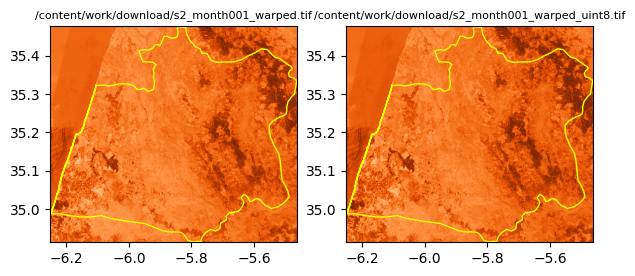

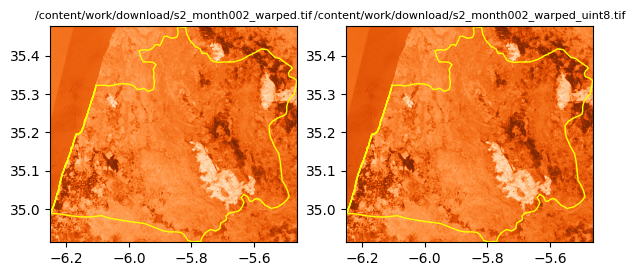

In [ ]:
# creating an empty list for the newly created uint8 data file names
uint8files = []

# warping them all by creating a FOR loop over all files in list
for f in sorted(nbrfiles):
  # making a file name for new files
  warpfile = f.split('.')[0]+'_warped.tif'
  uint8file = f.split('.')[0]+'_warped_uint8.tif'
  # calling the easy_warp function
  print("Warping raster file " + f)
  pygge.easy_warp(f, warpfile, epsg)
  # converting to uint8 data type and capping the pixel values at 2000
  print("Converting raster file " + warpfile + " to 8-bit unsigned integer data type.")
  pygge.convert_to_dtype(warpfile, uint8file, np.uint8, percentiles=[0,98])
  # adding the new file name to the list of file names
  uint8files.append(uint8file)
  # creating thumbnails for quality checking
  fig, ax = plt.subplots(1,2, figsize=(7,3.5))
  fig.patch.set_facecolor('white')
  pygge.easy_plot(warpfile, ax=ax[0], bands=[1], shapefile=shapefile, cmap='Oranges', percentiles=[0,99], title=warpfile)
  pygge.easy_plot(uint8file, ax=ax[1], bands=[1], shapefile=shapefile, cmap='Oranges', percentiles=[0,100], title=uint8file)

# after downloading and warping all image composites, getting a list of all warped tiff files in the directory
allfiles = [f for f in listdir(downloaddir) if isfile(join(downloaddir, f))]
warpfiles = [s for s in allfiles if "_warped.tif" in s]

print("Files after warping:")
pprint(sorted(warpfiles))

print("Files after conversion to uint8 data type:")
pprint(sorted(uint8files))

# Calculating dNBR

Creating arrays for the NBR rasters to calculate the dNBR value

In [ ]:
import rioxarray as rx

prefire_nbr1_path = join(downloaddir, 's2_month001.tif_nbr.tif')

prefire_nbr1_xr = rx.open_rasterio(prefire_nbr1_path, masked = True).squeeze()

prefire_nbr1_xr

<xarray.DataArray (y: 1256, x: 1754)>
[2203024 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -6.25 -6.25 -6.249 -6.249 ... -5.464 -5.463 -5.463
  * y            (y) float64 35.48 35.48 35.48 35.48 ... 34.91 34.91 34.91 34.91
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [ ]:
prefire_nbr2_path = join(downloaddir, 's2_month002.tif_nbr.tif')

prefire_nbr2_xr = rx.open_rasterio(prefire_nbr2_path, masked = True).squeeze()

prefire_nbr2_xr

<xarray.DataArray (y: 1256, x: 1754)>
[2203024 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -6.25 -6.25 -6.249 -6.249 ... -5.464 -5.463 -5.463
  * y            (y) float64 35.48 35.48 35.48 35.48 ... 34.91 34.91 34.91 34.91
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

Adding a merged polygon shapefile containing the polygons drawn for the analysis and the boundary data for the Larache Province

In [ ]:
merged_polygons = gpd.read_file('/content/drive/MyDrive/CW1_task2/merged_polygons/merged.shp')

# Plotting dNBR Raster

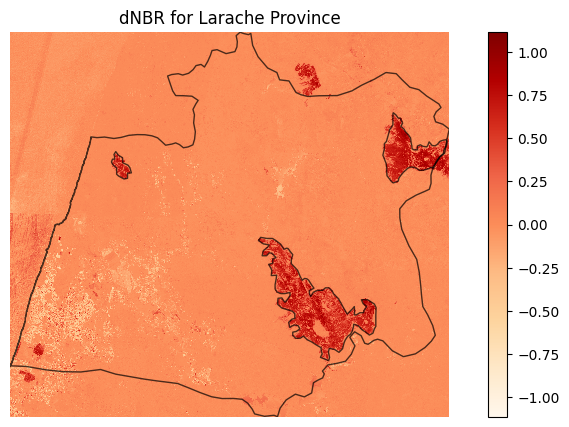

In [ ]:
dnbr = prefire_nbr1_xr - prefire_nbr2_xr

f, ax = plt.subplots(figsize =(10,5) )
dnbr.plot(cmap = 'OrRd')
merged_polygons.plot(ax=ax, alpha=0.7, facecolor='None', edgecolor='Black')
ax.set(title = "dNBR for Larache Province")
ax.set_axis_off()
plt.show()


Converting Raster to TIFF  

<function matplotlib.pyplot.show(close=None, block=None)>

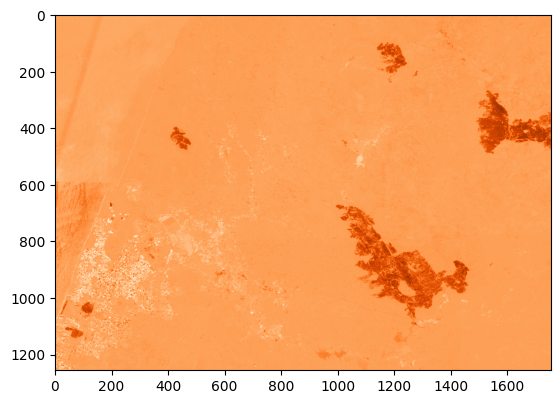

In [ ]:
dnbr.rio.to_raster('/content/drive/MyDrive/CW1_task2/dnbr.tif')

dnbr_img = rasterio.open('/content/drive/MyDrive/CW1_task2/dnbr.tif')
plt.imshow(dnbr_img.read(1), cmap = 'Oranges')
plt.show

Making the tif file into a list for the zonals statistics function defined further below.

In [ ]:
dnbr_zs = ['/content/drive/MyDrive/CW1_task2/dnbr.tif']

# Defining NDVI function

In [ ]:
'''
--------------------------------------------------------------
The following block of code is modified from:

Balzter, H. (2020)
Time series analysis in Python 2 (Version 10 January 2020)
https://github.com/eogit/gy7709/blob/master/P07_timeseries_analysis_2.ipynb
Downloaded 3 April 2023
--------------------------------------------------------------
'''

'\n--------------------------------------------------------------\nThe following block of code is modified from:\n\nBalzter, H. (2020)\nTime series analysis in Python 2 (Version 10 January 2020)\nhttps://github.com/eogit/gy7709/blob/master/P07_timeseries_analysis_2.ipynb\nDownloaded 3 April 2023\n--------------------------------------------------------------\n'

In [ ]:
def easy_ndvi(inputfile, outputfile):
  '''
  Calculates NDVI from an input red and NIR raster band file and saves it as a Geotiff raster.

  Args:
    outfile = string of the output filename and directory path for the NDVI raster file
  '''

  # open the input band file
  inputfile = rasterio.open(inputfile, 'r')
  # load the data from the red band file
  band_red = inputfile.read(1)


  # load the data from the NIR band file
  band_nir = inputfile.read(2)


  # The Sentinel-2 bands are delivered as uint16 data type (unsigned integer 16 bits per pixel).
  # This means that we cannot do floating point calculations on them without first converting them to float.
  # Convert the band arrays to float:
  band_red = np.float32(band_red)
  band_nir = np.float32(band_nir)

  # Calculate the vegetation index. This is done pixel by pixel using the NumPy masked array arithmetic.

  # We need to handle exceptions to the calculation. Where the sum of the two bands
  # in the denominator is zero (NIR+Red), the NDVI formula would give an error otherwise.
  # We do this by setting the NumPy error state to 'ignore' for this calculation only:


  with np.errstate(divide='ignore'): # this only applies to the following indented lines of code
    # NBR formula:
    ndvi = np.divide((band_nir - band_red), (band_nir + band_red)) # ignore division by zero errors here
    ndvi[(band_nir + band_red) == 0] = 0 # where NIR + Red is zero, set the NDVI to zero

  # save the NDVI image
  outputfile = rasterio.open(outputfile, 'w', driver="GTiff", width=inputfile.width,
                          height=inputfile.height, count=1, crs=inputfile.crs,
                          transform=inputfile.transform, dtype=np.float32)
  outputfile.write(ndvi, 1)
  outputfile.close()

  return()

# Calculating NDVI Rasters

In [ ]:
# making an empty list to store the file names of new NDVI files
ndvifiles = []

# iterating over all Sentinel-2 images and calculating NDVI
for x in range(len(files)):
  inputfile = files[x]
  # creating an output file name
  ndvifile = join(downloaddir, files[x] + "_ndvi.tif")
  # remembering the file name created
  ndvifiles.append(ndvifile)
  # calculating the NDVI raster
  easy_ndvi(inputfile, ndvifile)

print("List of all NDVI image files:")
for i in ndvifiles:
  print(i)

List of all NDVI image files:
/content/work/download/s2_month002.tif_ndvi.tif
/content/work/download/s2_month001.tif_ndvi.tif


# Plotting NDVI Rasters

Warping raster file /content/work/download/s2_month001.tif_ndvi.tif
/content/work/download/s2_month001_warped.tif already exists. Skipping this command.
Converting raster file /content/work/download/s2_month001_warped.tif to 8-bit unsigned integer data type.
Scaling from [-0.6177971363067627,0.5883092951774598] to [0, 255]
Warping raster file /content/work/download/s2_month002.tif_ndvi.tif
/content/work/download/s2_month002_warped.tif already exists. Skipping this command.
Converting raster file /content/work/download/s2_month002_warped.tif to 8-bit unsigned integer data type.
Scaling from [-0.5659552812576294,0.5919492840766907] to [0, 255]
Files after warping:
['s2_month001_warped.tif', 's2_month002_warped.tif']
Files after conversion to uint8 data type:
['/content/work/download/s2_month001_warped_uint8.tif',
 '/content/work/download/s2_month002_warped_uint8.tif']


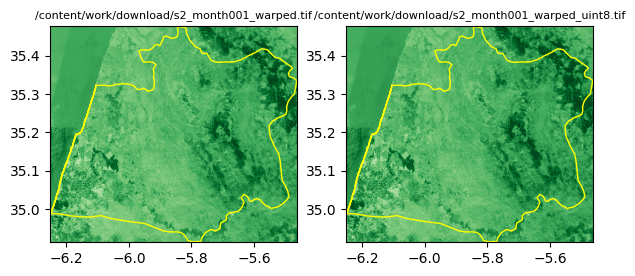

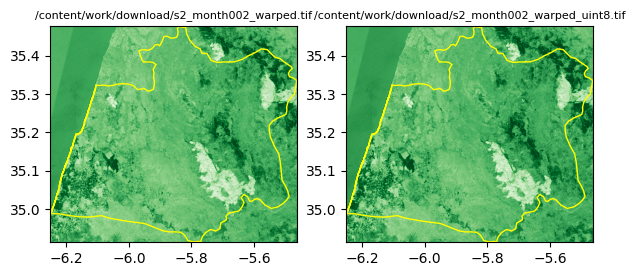

In [ ]:
# create and empty list for the newly created uint8 data file names
ndvi_uint8_files = []

# warping them all by creating a FOR loop over all files in our list
for f in sorted(ndvifiles):
  # make a file name for new files
  warpedfile = f.split('.')[0]+'_warped.tif'
  ndviuint8file = f.split('.')[0]+'_warped_uint8.tif'
  # calling the easy_warp function
  print("Warping raster file " + f)
  pygge.easy_warp(f, warpedfile, epsg)
  # convert to uint8 data type and cap the pixel values at 2000
  print("Converting raster file " + warpedfile + " to 8-bit unsigned integer data type.")
  pygge.convert_to_dtype(warpedfile, ndviuint8file, np.uint8, percentiles=[0,98])
  # adding the new file name to the list of file names
  ndvi_uint8_files.append(ndviuint8file)
  # creating thumbnails for quality checking
  fig, ax = plt.subplots(1,2, figsize=(7,3.5))
  fig.patch.set_facecolor('white')
  pygge.easy_plot(warpedfile, ax=ax[0], bands=[1], shapefile=shapefile, cmap='Greens', percentiles=[0,99], title=warpedfile)
  pygge.easy_plot(ndviuint8file, ax=ax[1], bands=[1], shapefile=shapefile, cmap='Greens', percentiles=[0,100], title=ndviuint8file)

# after downloading and warping all image composites, getting a list of all warped tiff files in the directory
allfiles = [f for f in listdir(downloaddir) if isfile(join(downloaddir, f))]
warpedfiles = [s for s in allfiles if "_warped.tif" in s]

print("Files after warping:")
pprint(sorted(warpedfiles))

print("Files after conversion to uint8 data type:")
pprint(sorted(ndvi_uint8_files))

# Calculating Difference in NDVI

Creating arrays for NDVI Rasters to calculate difference in NDVI

In [ ]:
prefire_ndvi1_path = join(downloaddir, 's2_month001.tif_ndvi.tif')

prefire_ndvi1_xr = rx.open_rasterio(prefire_ndvi1_path, masked = True).squeeze()

prefire_ndvi1_xr

<xarray.DataArray (y: 1256, x: 1754)>
[2203024 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -6.25 -6.25 -6.249 -6.249 ... -5.464 -5.463 -5.463
  * y            (y) float64 35.48 35.48 35.48 35.48 ... 34.91 34.91 34.91 34.91
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [ ]:
prefire_ndvi2_path = join(downloaddir, 's2_month002.tif_ndvi.tif')

prefire_ndvi2_xr = rx.open_rasterio(prefire_ndvi2_path, masked = True).squeeze()

prefire_ndvi2_xr

<xarray.DataArray (y: 1256, x: 1754)>
[2203024 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -6.25 -6.25 -6.249 -6.249 ... -5.464 -5.463 -5.463
  * y            (y) float64 35.48 35.48 35.48 35.48 ... 34.91 34.91 34.91 34.91
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

# Plotting difference in NDVI

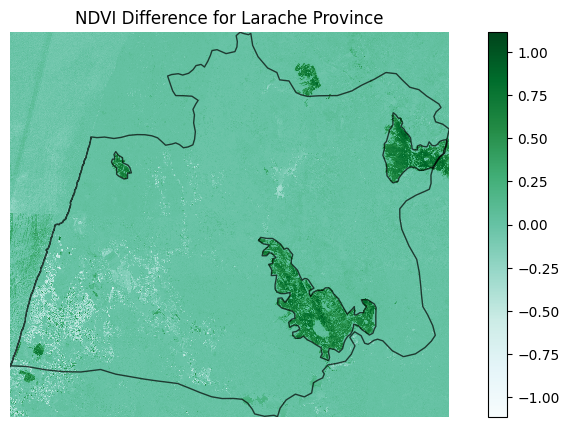

In [ ]:
ndvi_diff = prefire_ndvi2_xr - prefire_ndvi1_xr

f, ax = plt.subplots(figsize =(10,5) )
dnbr.plot(cmap = 'BuGn')
merged_polygons.plot(ax=ax, alpha=0.7, facecolor='None', edgecolor='Black')
ax.set(title = "NDVI Difference for Larache Province")
ax.set_axis_off()
plt.show()

Converting the Raster to TIFF

<function matplotlib.pyplot.show(close=None, block=None)>

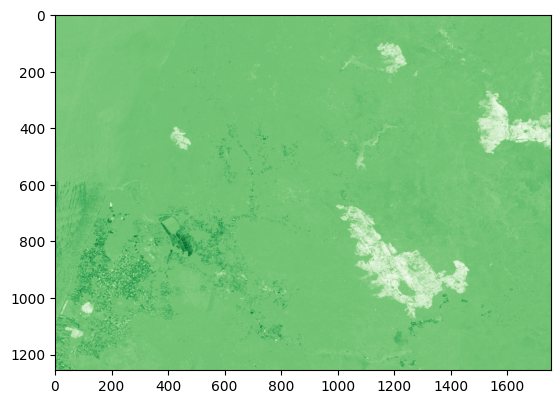

In [ ]:
ndvi_diff.rio.to_raster('/content/drive/MyDrive/CW1_task2/ndvi_diff.tif')

ndvi_diff_img = rasterio.open('/content/drive/MyDrive/CW1_task2/ndvi_diff.tif')
plt.imshow(ndvi_diff_img.read(1), cmap = 'Greens')
plt.show

Making the tif file into a list for the zonals statistics function defined further below

In [ ]:
ndvi_diff_zs = ['/content/drive/MyDrive/CW1_task2/ndvi_diff.tif']

# Defining Zonal Statitics Function
 The code was modified from pygge.easy_zonal_stats to include the multiple polygon IDs for the statistics

In [ ]:
'''
--------------------------------------------------------------
The following block of code is modified from:

Balzter, H. (2020)
Analysing Sentinel-2 images and extracting time-series statistics (Version 10 January 2020)
https://github.com/eogit/gy7709/blob/master/P08_zonalstats_with_cloudmask.ipynb
Downloaded 3 April 2023
----
'''

'\n--------------------------------------------------------------\nThe following block of code is modified from:\n\nBalzter, H. (2020)\nAnalysing Sentinel-2 images and extracting time-series statistics (Version 10 January 2020)\nhttps://github.com/eogit/gy7709/blob/master/P08_zonalstats_with_cloudmask.ipynb\nDownloaded 3 April 2023\n----\n'

In [ ]:
def easy_zonal_stats(rasterfiles, shapefile, statisticsfile, nodata=0,
                     stats="count min mean max median"):
  '''
  Extracts zonal statistics using rasterstats from a list of raster files and saves
    a single statisticsfile in .csv format as output.

  Args:
    rasterfiles = list of strings with raster file names with full direcroy paths
    shapefile = string giving the path and file name of the shapefile
    statisticsfile = string with the name of the output .csv file
    nodata (optional) = nodata value to be ignored in the calculation
    stats (optional) = string defining which statistics are calculated

  Returns: a Pandas dataframe with the statistics results saved into the statisticsfile
  '''

  # iterate over all raster files and extract zonal statistics
  for x in range(len(rasterfiles)):
    f = rasterfiles[x]
    # extract the string between the last slash and the dot in the file name and directory path as scene ID
    scene_id = f.split("/")[-1].split(".")[0]

    # get zonal statistics for all polygons in the shapefile
    # the result is a list of dictionaries
    statistics = zonal_stats(shapefile, f, nodata=nodata, stats=stats)

    # get number of rows for the output file as the product of n * m
    n = len(statistics) # number of polygons
    m = len(rasterfiles) # number of files

    if x == 0:
      # create the pandas dataframe in the first iteration with column names only
      df = pd.DataFrame(columns=['scene_id', 'polygon_id'].append(stats.split(" ")))

    # add the scene ID to each row in the statistics output from this scene (image)
    for row in range(n):
      statistics[row].update({"scene_id": scene_id})
      statistics[row].update({"polygon_id": row+ 1})

    # append rows to the dataframe in each iteration with the scene_id as index
    for s in statistics: # iterate over the list of dictionaries (one for each polygon)
      df = df.append(s, ignore_index=True)

  # After the loop, write the statistics dataframe to a .csv file (overwrite if exists)
  df.to_csv(statisticsfile, index=False)

  return(df)

# Adding Polygon Shapefile

The polygon shapefile contains the 3 major polygon areas identified to compare the zonal statistics for the fire.

In [ ]:
polygon_shapefile = join(rootdir, 'polygons_burnt', 'polygons_burnt.shp') # ESRI Shapefile of the study area

# check whether the shapefile exists
if os.path.exists(polygon_shapefile):
  print('Shapefile found: '+polygon_shapefile)
else:
  print('ERROR: Shapefile not found: '+polygon_shapefile)
  print('Upload a shapefile to your Google Drive directory: '+ rootdir)

Shapefile found: /content/drive/MyDrive/CW1_task2/polygons_burnt/polygons_burnt.shp


# Calculating Zonal Statistics

Calculating zonal statistics for the polygons.
Pre and Post Fire NBR and NDVI; dNBR and the difference in NDVI was used for the zonal statistics.

In [ ]:
# make the name of the statistics output file
nbr_statsfile = outdir + "/" + "nbr_zonalstats.csv"

# call the pygge function for processing zonal statistics for multiple raster files
nbr_zonalstats = easy_zonal_stats(uint8files, polygon_shapefile, nbr_statsfile, nodata=0)

print("\nSaved statistics file: " + nbr_statsfile)
# open the file
f = open(nbr_statsfile,"r")
# read and print its contents (all lines)
pprint(f.read().splitlines())
# close the file
f.close()

# make the filename of the new pickle file for the stats object
pklfile_nbr = nbr_statsfile.split(".")[0] + ".pkl"

# write object to file
with open(pklfile_nbr, "wb") as f:
  pickle.dump(nbr_zonalstats, f)
print("\nPickled zonal statistics as pandas dataframe in file: " + pklfile_nbr + "\n")


Saved statistics file: /content/work/out/nbr_zonalstats.csv
['min,max,mean,count,median,scene_id,polygon_id',
 '92.0,255.0,193.5830461750517,65295,195.0,s2_month001_warped_uint8,1',
 '98.0,250.0,181.3511366748836,3651,186.0,s2_month001_warped_uint8,2',
 '77.0,255.0,215.74303701637646,25097,225.0,s2_month001_warped_uint8,3',
 '19.0,255.0,87.47475304387778,65295,76.0,s2_month002_warped_uint8,1',
 '30.0,243.0,84.43960558751027,3651,73.0,s2_month002_warped_uint8,2',
 '24.0,255.0,94.54604135952505,25097,83.0,s2_month002_warped_uint8,3']

Pickled zonal statistics as pandas dataframe in file: /content/work/out/nbr_zonalstats.pkl



<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)
<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)
<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)
<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)
<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

In [ ]:
# make the name of the statistics output file
ndvi_statsfile = outdir + "/" + "ndvi_zonalstats.csv"

# call the pygge function for processing zonal statistics for multiple raster files
ndvi_zonalstats = easy_zonal_stats(ndvi_uint8_files, polygon_shapefile, ndvi_statsfile, nodata=0)

print("\nSaved statistics file: " + ndvi_statsfile)
# open the file
f = open(ndvi_statsfile,"r")
# read and print its contents (all lines)
pprint(f.read().splitlines())
# close the file
f.close()

# make the filename of the new pickle file for the stats object
pklfile_ndvi = ndvi_statsfile.split(".")[0] + ".pkl"

# write object to file
with open(pklfile_ndvi, "wb") as f:
  pickle.dump(ndvi_zonalstats, f)
print("\nPickled zonal statistics as pandas dataframe in file: " + pklfile_ndvi + "\n")

<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)
<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)
<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)



Saved statistics file: /content/work/out/ndvi_zonalstats.csv
['min,max,mean,count,median,scene_id,polygon_id',
 '92.0,255.0,193.5830461750517,65295,195.0,s2_month001_warped_uint8,1',
 '98.0,250.0,181.3511366748836,3651,186.0,s2_month001_warped_uint8,2',
 '77.0,255.0,215.74303701637646,25097,225.0,s2_month001_warped_uint8,3',
 '19.0,255.0,87.47475304387778,65295,76.0,s2_month002_warped_uint8,1',
 '30.0,243.0,84.43960558751027,3651,73.0,s2_month002_warped_uint8,2',
 '24.0,255.0,94.54604135952505,25097,83.0,s2_month002_warped_uint8,3']

Pickled zonal statistics as pandas dataframe in file: /content/work/out/ndvi_zonalstats.pkl



<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)
<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)
<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)


In [ ]:
# make the name of the statistics output file
dnbr_statsfile = outdir + "/" + "dnbr_zonalstats.csv"

# call the pygge function for processing zonal statistics for multiple raster files
dnbr_zonalstats = easy_zonal_stats(dnbr_zs, polygon_shapefile, dnbr_statsfile, nodata=0)

print("\nSaved statistics file: " + dnbr_statsfile)
# open the file
f = open(dnbr_statsfile,"r")
# read and print its contents (all lines)
pprint(f.read().splitlines())
# close the file
f.close()

# make the filename of the new pickle file for the stats object
pklfile_dnbr = dnbr_statsfile.split(".")[0] + ".pkl"

# write object to file
with open(pklfile_dnbr, "wb") as f:
  pickle.dump(dnbr_zonalstats, f)
print("\nPickled zonal statistics as pandas dataframe in file: " + pklfile_dnbr + "\n")


Saved statistics file: /content/work/out/dnbr_zonalstats.csv
['min,max,mean,count,median,scene_id,polygon_id',
 '-0.3246888220310211,0.9767789840698242,0.46687617256298336,65295,0.5155120491981506,dnbr,1',
 '-0.016974251717329025,0.843960165977478,0.42260849178735277,3651,0.4929600954055786,dnbr,2',
 '-0.24523887038230896,1.1141149997711182,0.5496506367792964,25097,0.6240482330322266,dnbr,3']

Pickled zonal statistics as pandas dataframe in file: /content/work/out/dnbr_zonalstats.pkl



<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)
<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)
<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)


In [ ]:
# make the name of the statistics output file
ndvi_diff_statsfile = outdir + "/" + "ndvi_diff_zonalstats.csv"

# call the pygge function for processing zonal statistics for multiple raster files
ndvi_diff_zonalstats = easy_zonal_stats(uint8files, polygon_shapefile, ndvi_diff_statsfile, nodata=0)

print("\nSaved statistics file: " + ndvi_diff_statsfile)
# open the file
f = open(ndvi_diff_statsfile,"r")
# read and print its contents (all lines)
pprint(f.read().splitlines())
# close the file
f.close()

# make the filename of the new pickle file for the stats object
pklfile_ndvi_diff = ndvi_diff_statsfile.split(".")[0] + ".pkl"

# write object to file
with open(pklfile_ndvi_diff, "wb") as f:
  pickle.dump(ndvi_diff_zonalstats, f)
print("\nPickled zonal statistics as pandas dataframe in file: " + pklfile_ndvi_diff + "\n")

<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)



Saved statistics file: /content/work/out/ndvi_diff_zonalstats.csv
['min,max,mean,count,median,scene_id,polygon_id',
 '92.0,255.0,193.5830461750517,65295,195.0,s2_month001_warped_uint8,1',
 '98.0,250.0,181.3511366748836,3651,186.0,s2_month001_warped_uint8,2',
 '77.0,255.0,215.74303701637646,25097,225.0,s2_month001_warped_uint8,3',
 '19.0,255.0,87.47475304387778,65295,76.0,s2_month002_warped_uint8,1',
 '30.0,243.0,84.43960558751027,3651,73.0,s2_month002_warped_uint8,2',
 '24.0,255.0,94.54604135952505,25097,83.0,s2_month002_warped_uint8,3']

Pickled zonal statistics as pandas dataframe in file: /content/work/out/ndvi_diff_zonalstats.pkl



<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)
<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)
<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)
<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)
<ipython-input-35-317e84282b4d>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

# Creating Bar Charts from the zonal statistics for the variables

In [ ]:
'''
--------------------------------------------------------------
The following block of code is modified from:

Balzter, H. (2020)
Analysing Sentinel-2 images and extracting time-series statistics (Version 10 January 2020)
https://github.com/eogit/gy7709/blob/master/P08_zonalstats_with_cloudmask.ipynb
Downloaded 3 April 2023
----
'''

'\n--------------------------------------------------------------\nThe following block of code is modified from:\n\nBalzter, H. (2020)\nAnalysing Sentinel-2 images and extracting time-series statistics (Version 10 January 2020)\nhttps://github.com/eogit/gy7709/blob/master/P08_zonalstats_with_cloudmask.ipynb\nDownloaded 3 April 2023\n----\n'


Plotting statistics from file:  /content/work/out/nbr_zonalstats.pkl
<bound method NDFrame.head of     min    max        mean  count  median                  scene_id  \
0  92.0  255.0  193.583046  65295   195.0  s2_month001_warped_uint8   
1  98.0  250.0  181.351137   3651   186.0  s2_month001_warped_uint8   
2  77.0  255.0  215.743037  25097   225.0  s2_month001_warped_uint8   
3  19.0  255.0   87.474753  65295    76.0  s2_month002_warped_uint8   
4  30.0  243.0   84.439606   3651    73.0  s2_month002_warped_uint8   
5  24.0  255.0   94.546041  25097    83.0  s2_month002_warped_uint8   

   polygon_id  
0           1  
1           2  
2           3  
3           1  
4           2  
5           3  >
Available file types for the graphics files:
{'Encapsulated Postscript': ['eps'],
 'Joint Photographic Experts Group': ['jpeg', 'jpg'],
 'PGF code for LaTeX': ['pgf'],
 'Portable Document Format': ['pdf'],
 'Portable Network Graphics': ['png'],
 'Postscript': ['ps'],
 'Raw RGBA bitmap': [

<Figure size 640x480 with 0 Axes>

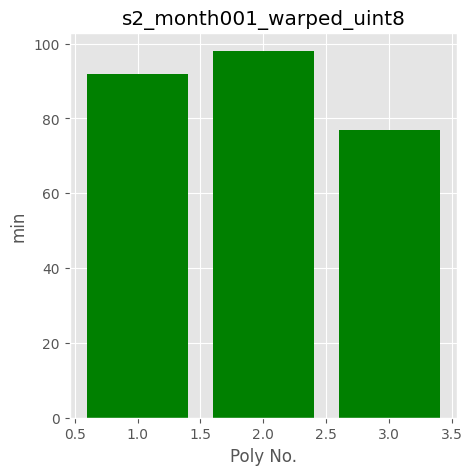

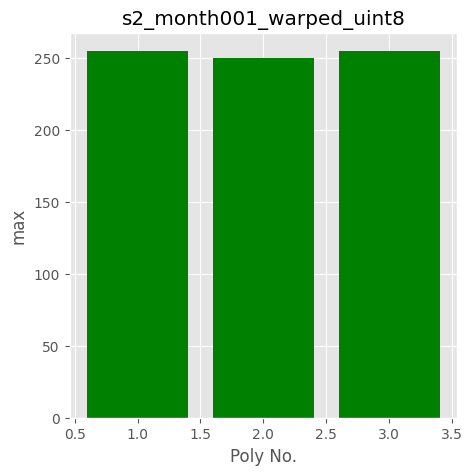

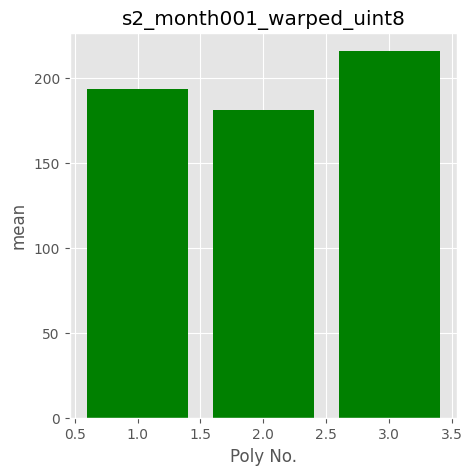

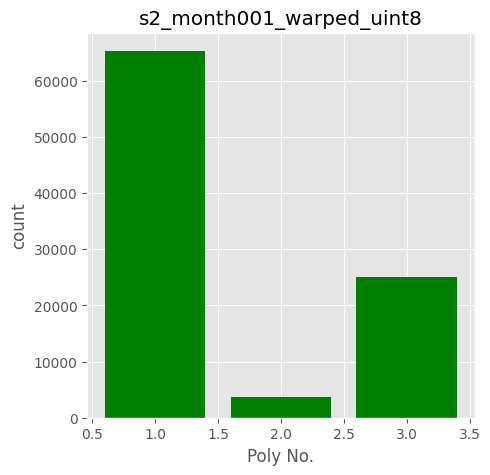

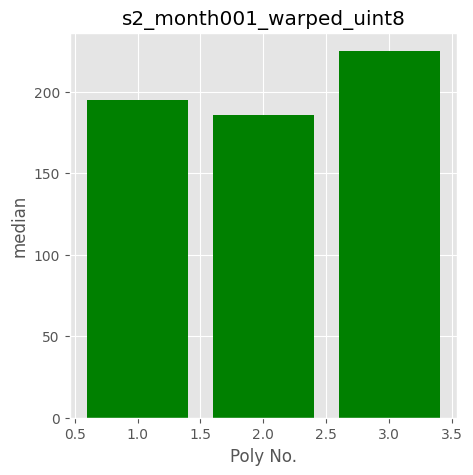

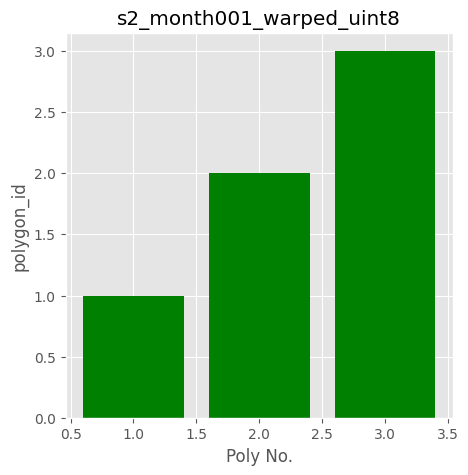

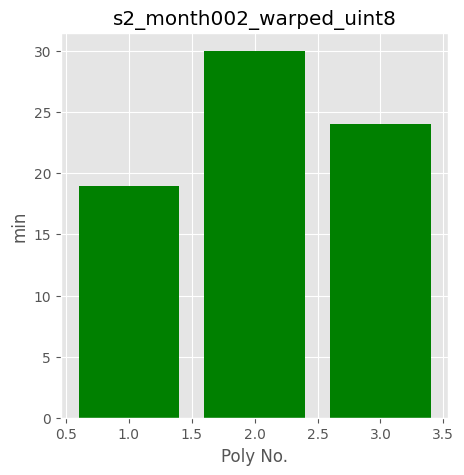

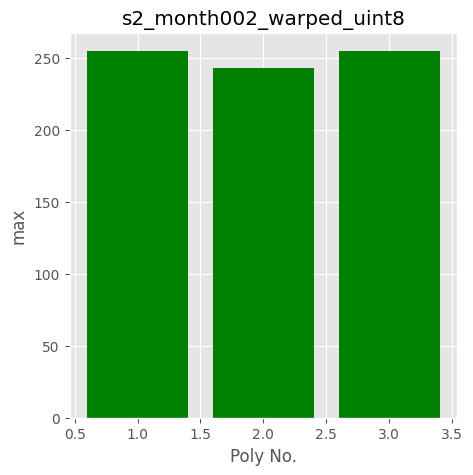

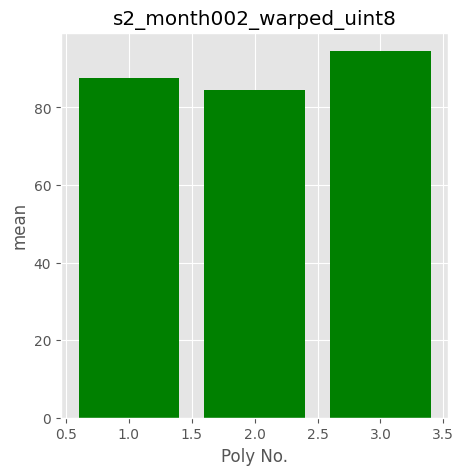

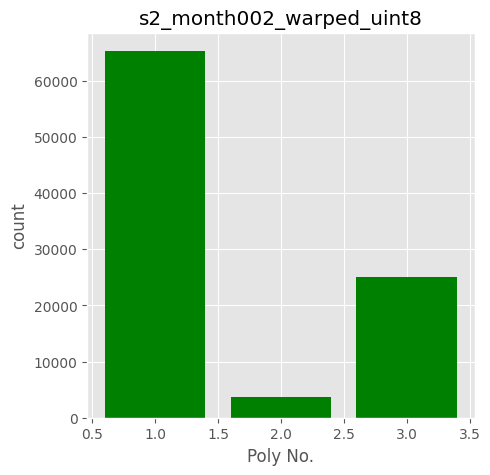

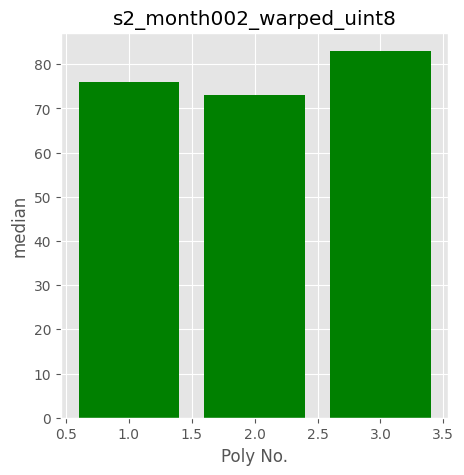

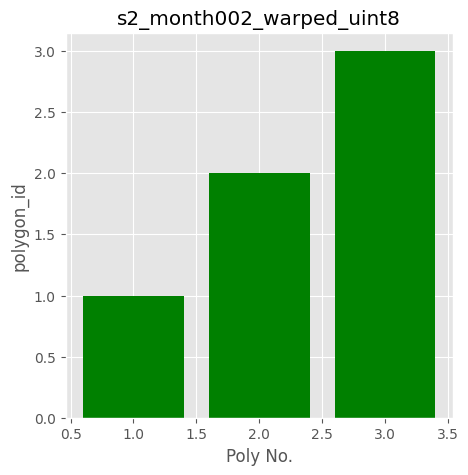

In [ ]:
# reading the dataframe object from file
df = pickle.load(open(pklfile_nbr, 'rb'))
print("\nPlotting statistics from file: ", pklfile_nbr)
print(df.head)

# get a list of unique scene IDs from the dataframe
scene_ids = sorted(df['scene_id'].unique())

print("Available file types for the graphics files:")
pprint(plt.gcf().canvas.get_supported_filetypes_grouped())

# iterate over all scene IDs in the pandas dataframe
for x in scene_ids:
  # extract the rows for that scene ID from the full dataframe
  b = df.loc[df['scene_id'] == x]

  # iterate over all columns
  for key, values in b.items():
    if key != "scene_id":
      # make a bar chart of the data for each column in the dataframe
      fig = plt.figure(figsize=(5,5))
      plt.style.use('ggplot')
      plt.bar(range(1, 1+len(values)), values, color='green')
      plt.xlabel("Poly No.")
      plt.ylabel(key)
      plt.title(x)
      # show the plot on screen
      fig.show()
      # save the plot to a tiff file
      filename = pklfile_nbr.split(".")[0] + key + ".jpg"
      print(filename)
      fig.savefig(filename, format="jpg")


Plotting statistics from file:  /content/work/out/ndvi_zonalstats.pkl
<bound method NDFrame.head of     min    max        mean  count  median                  scene_id  \
0  92.0  255.0  193.583046  65295   195.0  s2_month001_warped_uint8   
1  98.0  250.0  181.351137   3651   186.0  s2_month001_warped_uint8   
2  77.0  255.0  215.743037  25097   225.0  s2_month001_warped_uint8   
3  19.0  255.0   87.474753  65295    76.0  s2_month002_warped_uint8   
4  30.0  243.0   84.439606   3651    73.0  s2_month002_warped_uint8   
5  24.0  255.0   94.546041  25097    83.0  s2_month002_warped_uint8   

   polygon_id  
0           1  
1           2  
2           3  
3           1  
4           2  
5           3  >
Available file types for the graphics files:
{'Encapsulated Postscript': ['eps'],
 'Joint Photographic Experts Group': ['jpeg', 'jpg'],
 'PGF code for LaTeX': ['pgf'],
 'Portable Document Format': ['pdf'],
 'Portable Network Graphics': ['png'],
 'Postscript': ['ps'],
 'Raw RGBA bitmap': 

<Figure size 640x480 with 0 Axes>

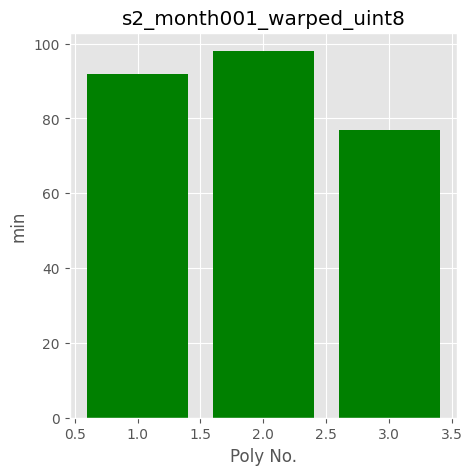

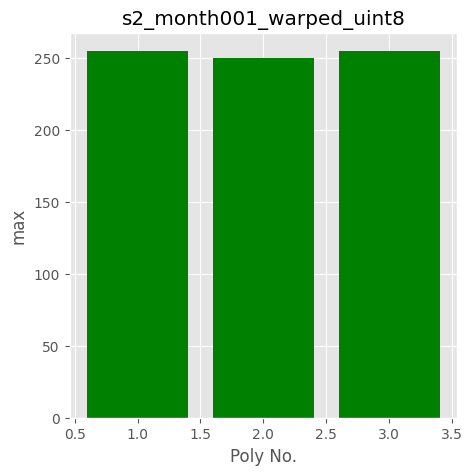

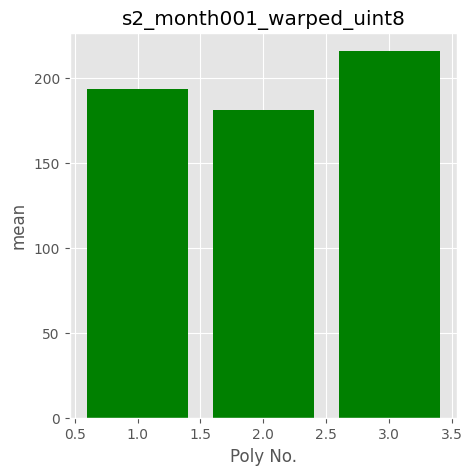

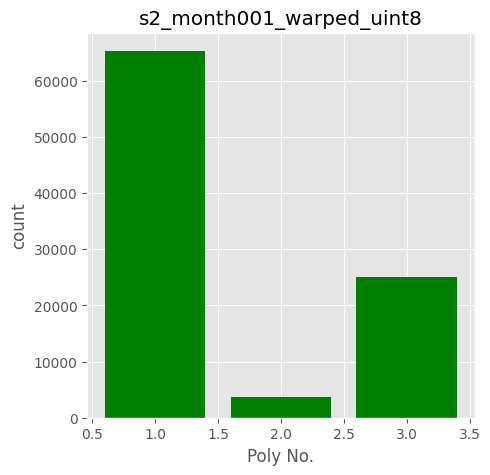

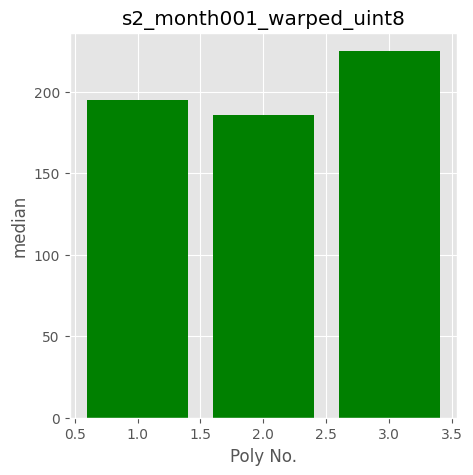

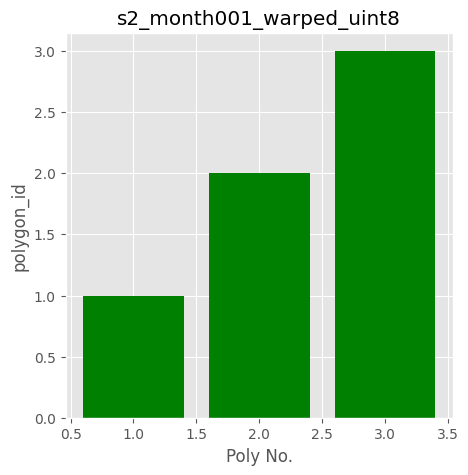

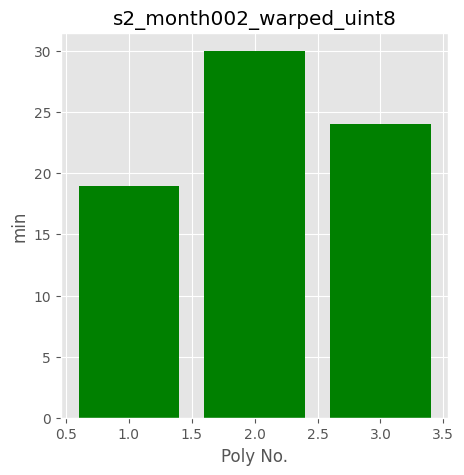

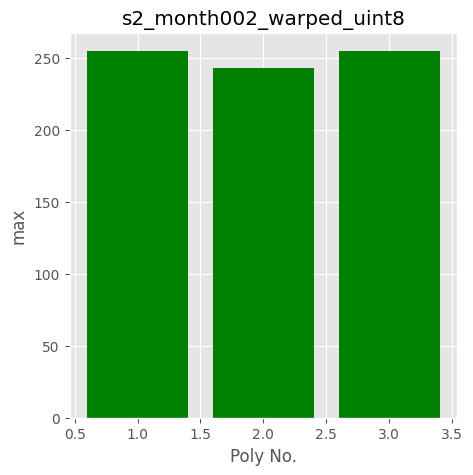

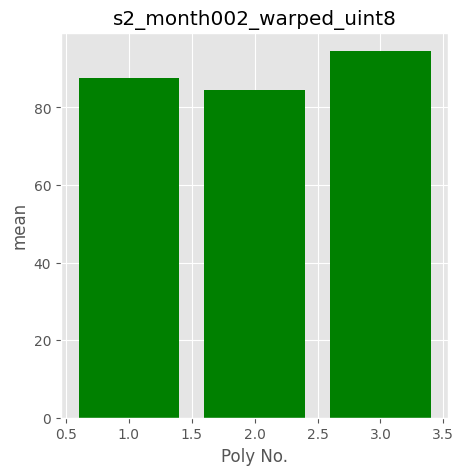

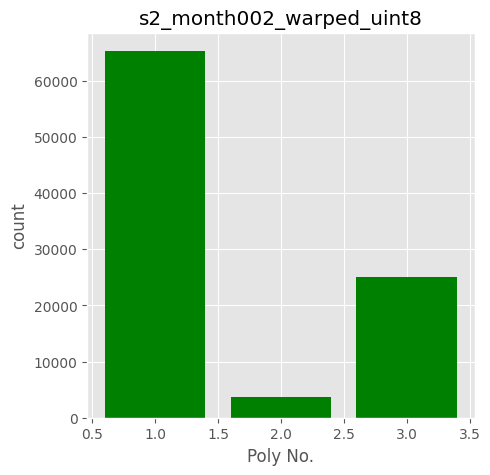

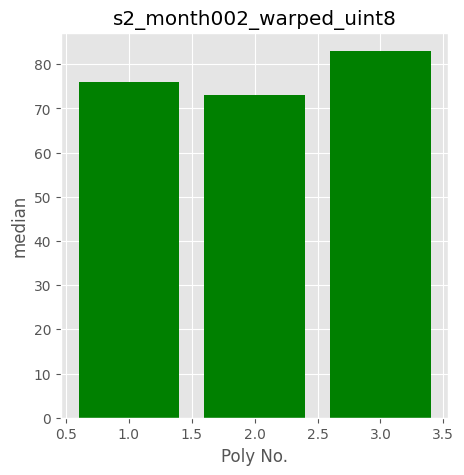

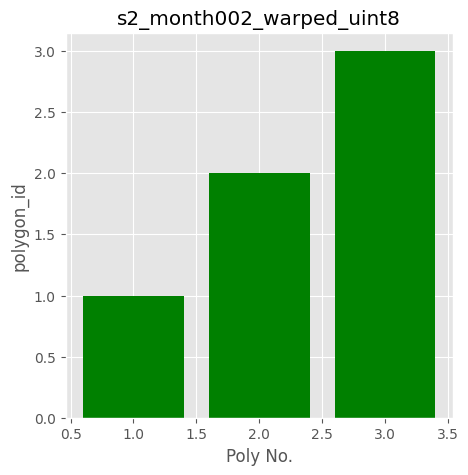

In [ ]:
# reading the dataframe object from file
df = pickle.load(open(pklfile_ndvi, 'rb'))
print("\nPlotting statistics from file: ", pklfile_ndvi)
print(df.head)

# get a list of unique scene IDs from the dataframe
scene_ids = sorted(df['scene_id'].unique())

print("Available file types for the graphics files:")
pprint(plt.gcf().canvas.get_supported_filetypes_grouped())

# iterate over all scene IDs in the pandas dataframe
for x in scene_ids:
  # extract the rows for that scene ID from the full dataframe
  b = df.loc[df['scene_id'] == x]

  # iterate over all columns
  for key, values in b.items():
    if key != "scene_id":
      # make a bar chart of the data for each column in the dataframe
      fig = plt.figure(figsize=(5,5))
      plt.style.use('ggplot')
      plt.bar(range(1, 1+len(values)), values, color='green')
      plt.xlabel("Poly No.")
      plt.ylabel(key)
      plt.title(x)
      # show the plot on screen
      fig.show()
      # save the plot to a tiff file
      filename = pklfile_ndvi.split(".")[0] + key + ".jpg"
      print(filename)
      fig.savefig(filename, format="jpg")


Plotting statistics from file:  /content/work/out/dnbr_zonalstats.pkl
<bound method NDFrame.head of         min       max      mean  count    median scene_id  polygon_id
0 -0.324689  0.976779  0.466876  65295  0.515512     dnbr           1
1 -0.016974  0.843960  0.422608   3651  0.492960     dnbr           2
2 -0.245239  1.114115  0.549651  25097  0.624048     dnbr           3>
Available file types for the graphics files:
{'Encapsulated Postscript': ['eps'],
 'Joint Photographic Experts Group': ['jpeg', 'jpg'],
 'PGF code for LaTeX': ['pgf'],
 'Portable Document Format': ['pdf'],
 'Portable Network Graphics': ['png'],
 'Postscript': ['ps'],
 'Raw RGBA bitmap': ['raw', 'rgba'],
 'Scalable Vector Graphics': ['svg', 'svgz'],
 'Tagged Image File Format': ['tif', 'tiff'],
 'WebP Image Format': ['webp']}
/content/work/out/dnbr_zonalstatsmin.jpg
/content/work/out/dnbr_zonalstatsmax.jpg
/content/work/out/dnbr_zonalstatsmean.jpg
/content/work/out/dnbr_zonalstatscount.jpg
/content/work/out/dnbr

<Figure size 640x480 with 0 Axes>

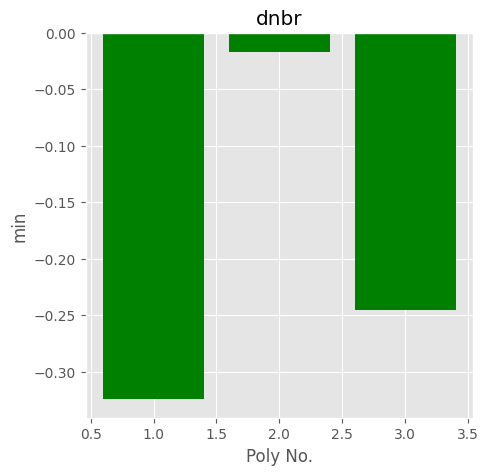

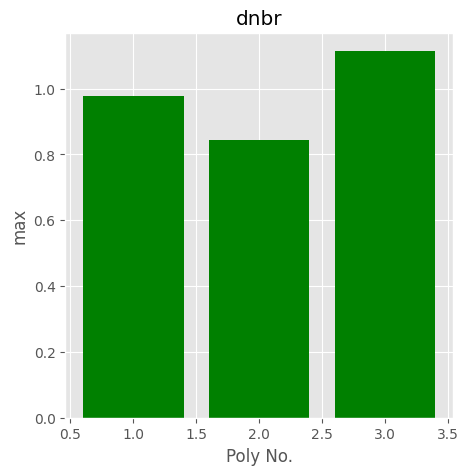

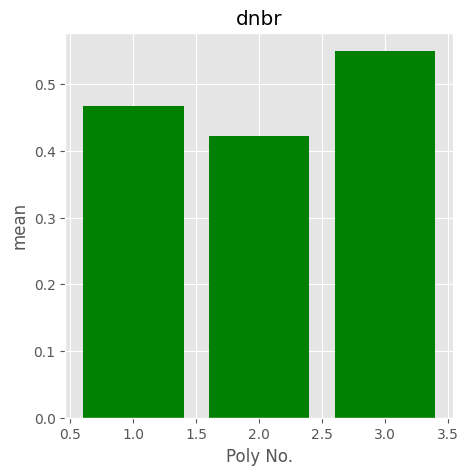

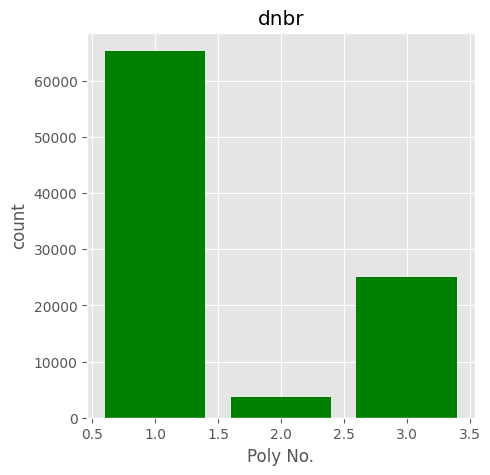

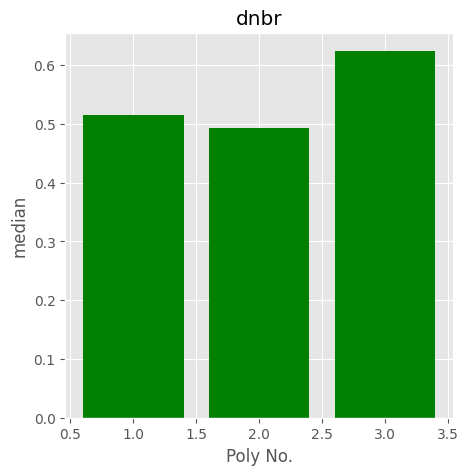

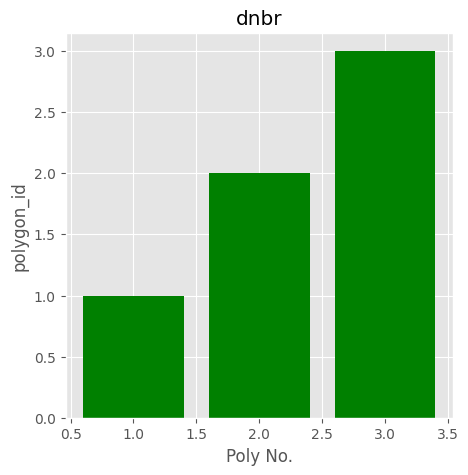

In [ ]:
# reading the dataframe object from file
df = pickle.load(open(pklfile_dnbr, 'rb'))
print("\nPlotting statistics from file: ", pklfile_dnbr)
print(df.head)

# get a list of unique scene IDs from the dataframe
scene_ids = sorted(df['scene_id'].unique())

print("Available file types for the graphics files:")
pprint(plt.gcf().canvas.get_supported_filetypes_grouped())

# iterate over all scene IDs in the pandas dataframe
for x in scene_ids:
  # extract the rows for that scene ID from the full dataframe
  b = df.loc[df['scene_id'] == x]

  # iterate over all columns
  for key, values in b.items():
    if key != "scene_id":
      # make a bar chart of the data for each column in the dataframe
      fig = plt.figure(figsize=(5,5))
      plt.style.use('ggplot')
      plt.bar(range(1, 1+len(values)), values, color='green')
      plt.xlabel("Poly No.")
      plt.ylabel(key)
      plt.title(x)
      # show the plot on screen
      fig.show()
      # save the plot to a tiff file
      filename = pklfile_dnbr.split(".")[0] + key + ".jpg"
      print(filename)
      fig.savefig(filename, format="jpg")


Plotting statistics from file:  /content/work/out/ndvi_diff_zonalstats.pkl
<bound method NDFrame.head of     min    max        mean  count  median                  scene_id  \
0  92.0  255.0  193.583046  65295   195.0  s2_month001_warped_uint8   
1  98.0  250.0  181.351137   3651   186.0  s2_month001_warped_uint8   
2  77.0  255.0  215.743037  25097   225.0  s2_month001_warped_uint8   
3  19.0  255.0   87.474753  65295    76.0  s2_month002_warped_uint8   
4  30.0  243.0   84.439606   3651    73.0  s2_month002_warped_uint8   
5  24.0  255.0   94.546041  25097    83.0  s2_month002_warped_uint8   

   polygon_id  
0           1  
1           2  
2           3  
3           1  
4           2  
5           3  >
Available file types for the graphics files:
{'Encapsulated Postscript': ['eps'],
 'Joint Photographic Experts Group': ['jpeg', 'jpg'],
 'PGF code for LaTeX': ['pgf'],
 'Portable Document Format': ['pdf'],
 'Portable Network Graphics': ['png'],
 'Postscript': ['ps'],
 'Raw RGBA bitm

<Figure size 640x480 with 0 Axes>

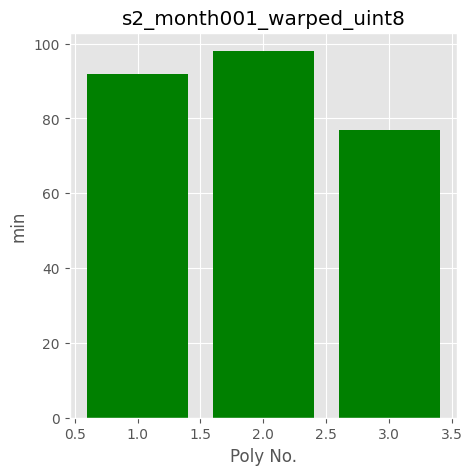

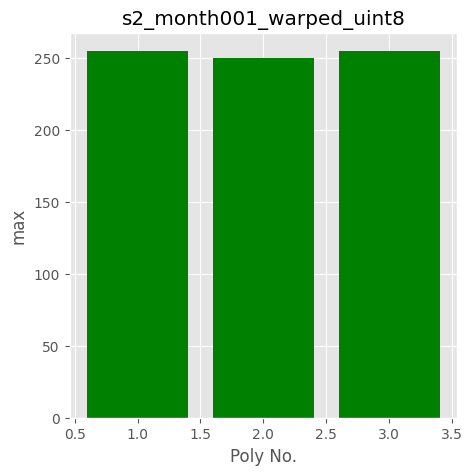

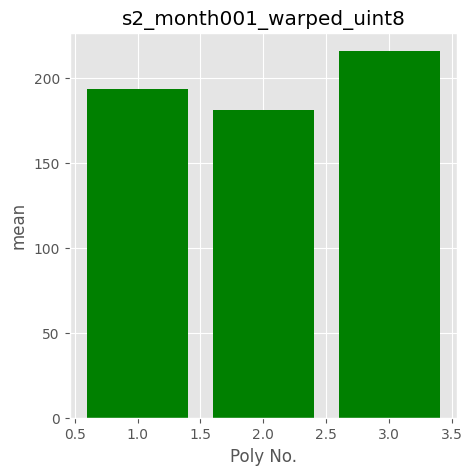

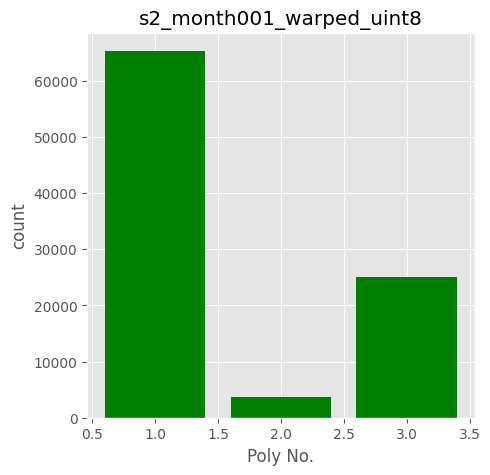

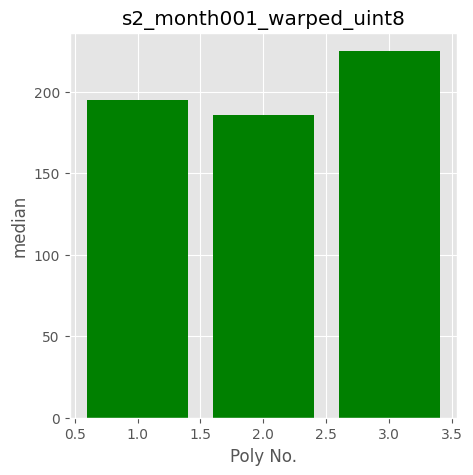

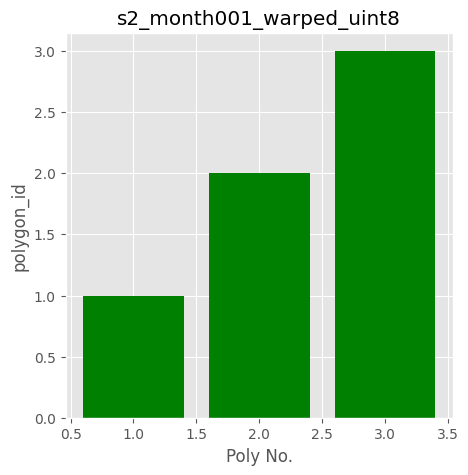

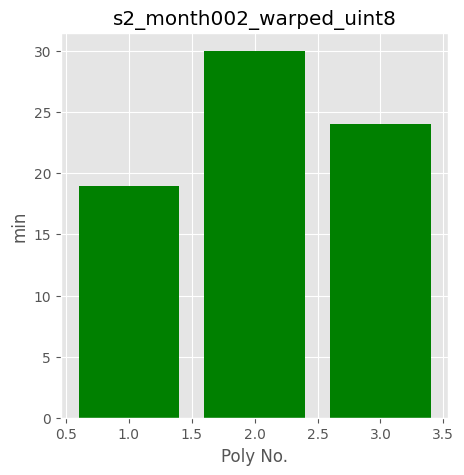

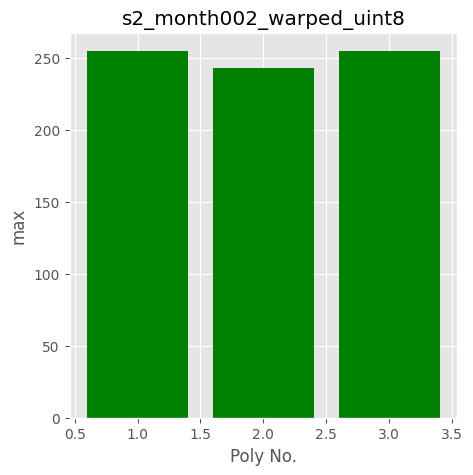

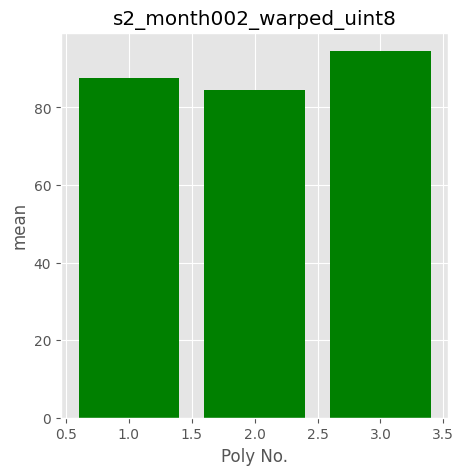

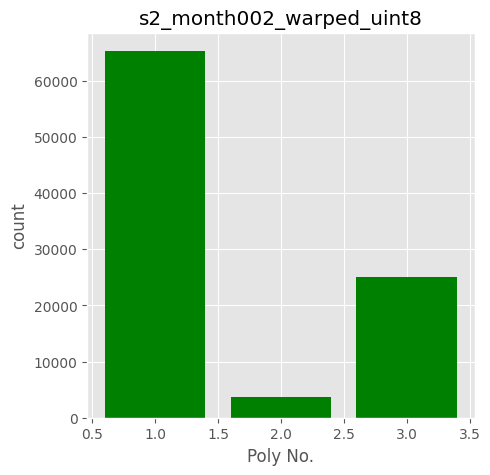

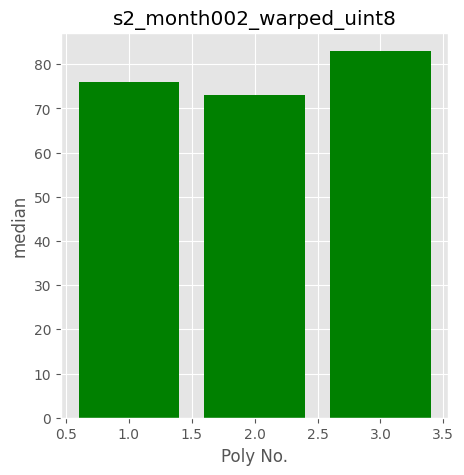

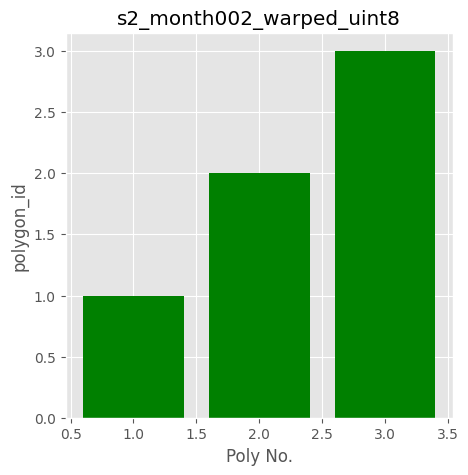

In [ ]:
# reading the dataframe object from file
df = pickle.load(open(pklfile_ndvi_diff, 'rb'))
print("\nPlotting statistics from file: ", pklfile_ndvi_diff)
print(df.head)

# get a list of unique scene IDs from the dataframe
scene_ids = sorted(df['scene_id'].unique())

print("Available file types for the graphics files:")
pprint(plt.gcf().canvas.get_supported_filetypes_grouped())

# iterate over all scene IDs in the pandas dataframe
for x in scene_ids:
  # extract the rows for that scene ID from the full dataframe
  b = df.loc[df['scene_id'] == x]

  # iterate over all columns
  for key, values in b.items():
    if key != "scene_id":
      # make a bar chart of the data for each column in the dataframe
      fig = plt.figure(figsize=(5,5))
      plt.style.use('ggplot')
      plt.bar(range(1, 1+len(values)), values, color='green')
      plt.xlabel("Poly No.")
      plt.ylabel(key)
      plt.title(x)
      # show the plot on screen
      fig.show()
      # save the plot to a tiff file
      filename = pklfile_ndvi_diff.split(".")[0] + key + ".jpg"
      print(filename)
      fig.savefig(filename, format="jpg")

polygon_id                         1           2           3
scene_id                                                    
s2_month001_warped_uint8  193.583046  181.351137  215.743037
s2_month002_warped_uint8   87.474753   84.439606   94.546041


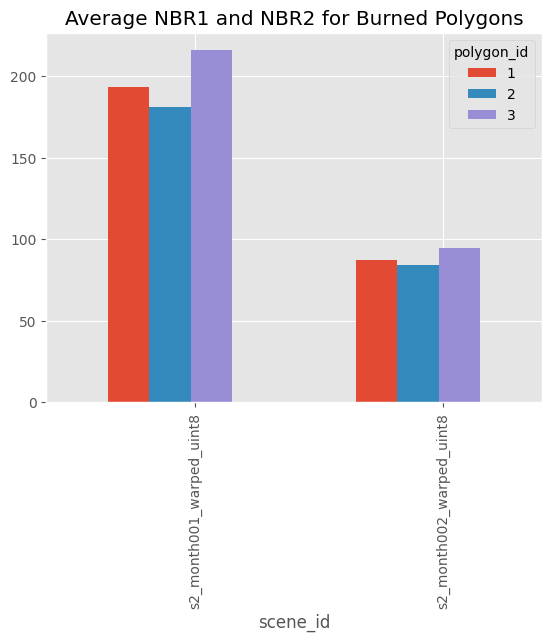

In [ ]:
# This chunk prints the Average NBR statistics results for each of the three burned polygons
# for pre and post fire incident.

data = pickle.load(open(pklfile_nbr, 'rb'))
mean_nbr_data = data[['mean', 'scene_id', 'polygon_id']]
mean_pivot_nbr_df = mean_nbr_data.pivot(index='scene_id', columns='polygon_id', values='mean')

print(mean_pivot_nbr_df)

#Plotting pre-fire NBR and post-fire NBR for selected Burned Polygons
# Here "nbr_s2_month001_warped_uint8" = PRE FIRE NBR;
# "nbr_s2_month002_warped_uint8" = POST FIRE NBR

ax = mean_pivot_nbr_df.plot(kind='bar',position=0.7,width=0.5, title='Average NBR1 and NBR2 for Burned Polygons')
plt.show()

polygon_id                         1           2           3
scene_id                                                    
s2_month001_warped_uint8  193.583046  181.351137  215.743037
s2_month002_warped_uint8   87.474753   84.439606   94.546041


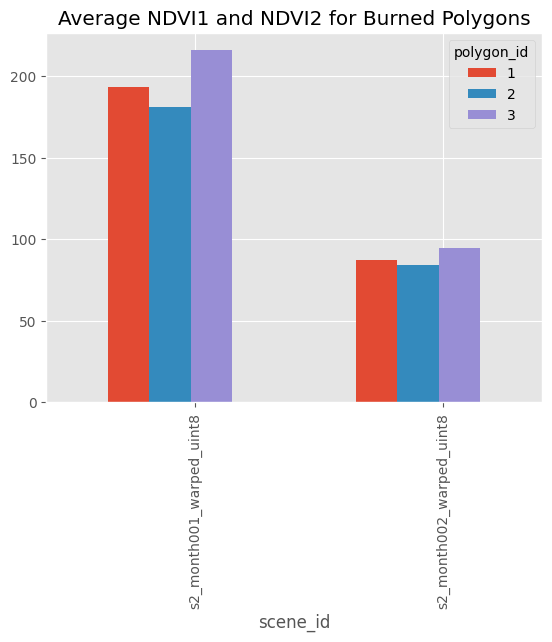

In [ ]:
# This chunk prints the Average NDVI statistics results for each of the three burned polygons
# for pre and post fire incident.

data = pickle.load(open(pklfile_ndvi, 'rb'))
mean_ndvi_data = data[['mean', 'scene_id', 'polygon_id']]
mean_pivot_ndvi_df = mean_ndvi_data.pivot(index='scene_id', columns='polygon_id', values='mean')

print(mean_pivot_ndvi_df)

#Plotting pre-fire NDVI and post-fire NDVI for selected Burned Polygons
# Here "nbr_s2_month001_warped_uint8" = PRE FIRE NDVI;
# "nbr_s2_month002_warped_uint8" = POST FIRE NDVI

ax = mean_pivot_ndvi_df.plot(kind='bar',position=0.7,width=0.5, title='Average NDVI1 and NDVI2 for Burned Polygons')
plt.show()

polygon_id         1         2         3
scene_id                                
dnbr        0.466876  0.422608  0.549651


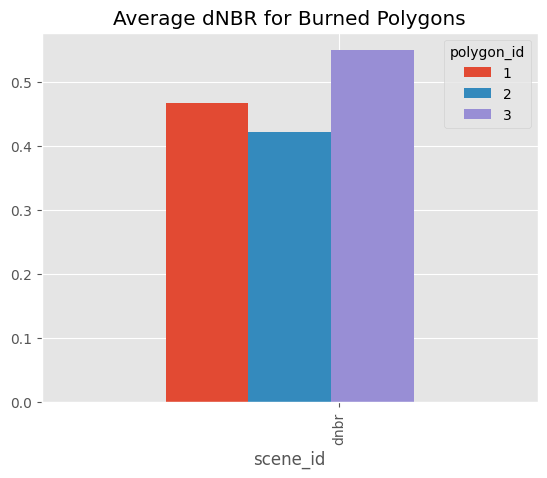

In [ ]:
# This chunk prints the Average dNBR statistics results for each of the three burned polygons

data = pickle.load(open(pklfile_dnbr, 'rb'))
mean_dnbr_data = data[['mean', 'scene_id', 'polygon_id']]
mean_pivot_dnbr = mean_dnbr_data.pivot(index='scene_id', columns='polygon_id', values='mean')

print(mean_pivot_dnbr)

#Plotting average dNBR for selected Burned Polygons
ax = mean_pivot_dnbr.plot(kind='bar',position=0.7,width=0.5, title='Average dNBR for Burned Polygons')
plt.show()

polygon_id                         1           2           3
scene_id                                                    
s2_month001_warped_uint8  193.583046  181.351137  215.743037
s2_month002_warped_uint8   87.474753   84.439606   94.546041


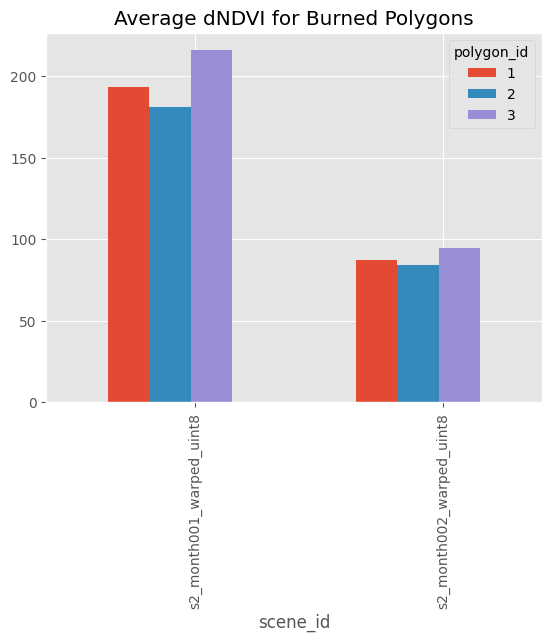

In [ ]:
# This chunk prints the Average dNDVI statistics results for each of the three burned polygons

data = pickle.load(open(pklfile_ndvi_diff, 'rb'))
mean_dndvi_data = data[['mean', 'scene_id', 'polygon_id']]
mean_pivot_dndvi = mean_dndvi_data.pivot(index='scene_id', columns='polygon_id', values='mean')

print(mean_pivot_dndvi)

#Plotting average NDVI difference for selected Burned Polygons
ax = mean_pivot_dndvi.plot(kind='bar',position=0.7,width=0.5, title='Average dNDVI for Burned Polygons')
plt.show()

# Calculating the correlation between dNBR and loss in NDVI

In general, a fire can cause a significant loss in NDVI, resulting in a negative difference in NDVI values (NDVI_after - NDVI_before < 0), while at the same time, increasing the DNBR value. Therefore, we might expect a negative correlation between DNBR and the difference in NDVI. Here, the two are highly correlated, i.e. an increase in dNBR explains the 78.65% loss in NDVI.

In [ ]:
correlation = np.corrcoef(dnbr, ndvi_diff)[0,1]
correlation

0.7865316048697344

In [ ]:
!pip install -U notebook-as-pdf
!pyppeteer-install
!jupyter nbconvert /content/drive/MyDrive/CW1_task2/229040002_GY7709_CW1.ipynb --to html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.6 MB/s eta 0:00:00
[INFO] Starting Chromium download.
100% 109M/109M [00:00<00:00, 183Mb/s]
[INFO] Beginning extraction
[INFO] Chromium extracted to: /root/.local/share/pyppeteer/local-chromium/588429
[NbConvertApp] Converting notebook /content/drive/MyDrive/CW1_task2/229040002_GY7709_CW1.ipynb to html
[NbConvertApp] Writing 4453703 bytes to /content/drive/MyDrive/CW1_task2/229040002_GY7709_CW1.html
